### PROJECT CODE: PRCP-1013-WalkRunClass
    
### PROJECT NAME: Walking Running Classification

#### INTRODUCTION

The given dataset contains a single file which represents 88588 sensor data samples collected from accelerometer and gyroscope at different points in time.This data is represented by following columns (each column contains sensor data for one of the sensor's axes):

acceleration_x acceleration_y acceleration_z gyro_x gyro_y gyro_z There is an activity type represented by "activity" column which acts as label and reflects following activities:

"0": walking

"1": running

Apart of that, the dataset contains "wrist" column which represents the wrist where the device was placed to collect a sample on:

"0": left wrist

"1": right wrist

### STEP 1: IMPORT NECESSARY LIBRARIES AND PACKAGES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import warnings
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
warnings.filterwarnings('ignore')

### STEP 2: LOAD THE DATASET

In [2]:
data = pd.read_csv("walkrun.csv")

### STEP 3: EXPLORATORY DATA ANALYSIS

In [3]:
data.head(5)

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


#### Checking null values

In [4]:
data.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

There are no missing values

#### Checking for duplicates

In [5]:
data.duplicated().sum()

0

There are no duplicates.

#### 'Date','Time','Username', and 'wrist' can be removed as it is obvious 'that they don't affect the target variable('Activity')

In [6]:
data=data.iloc[:,4:]
data

,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...
88583,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


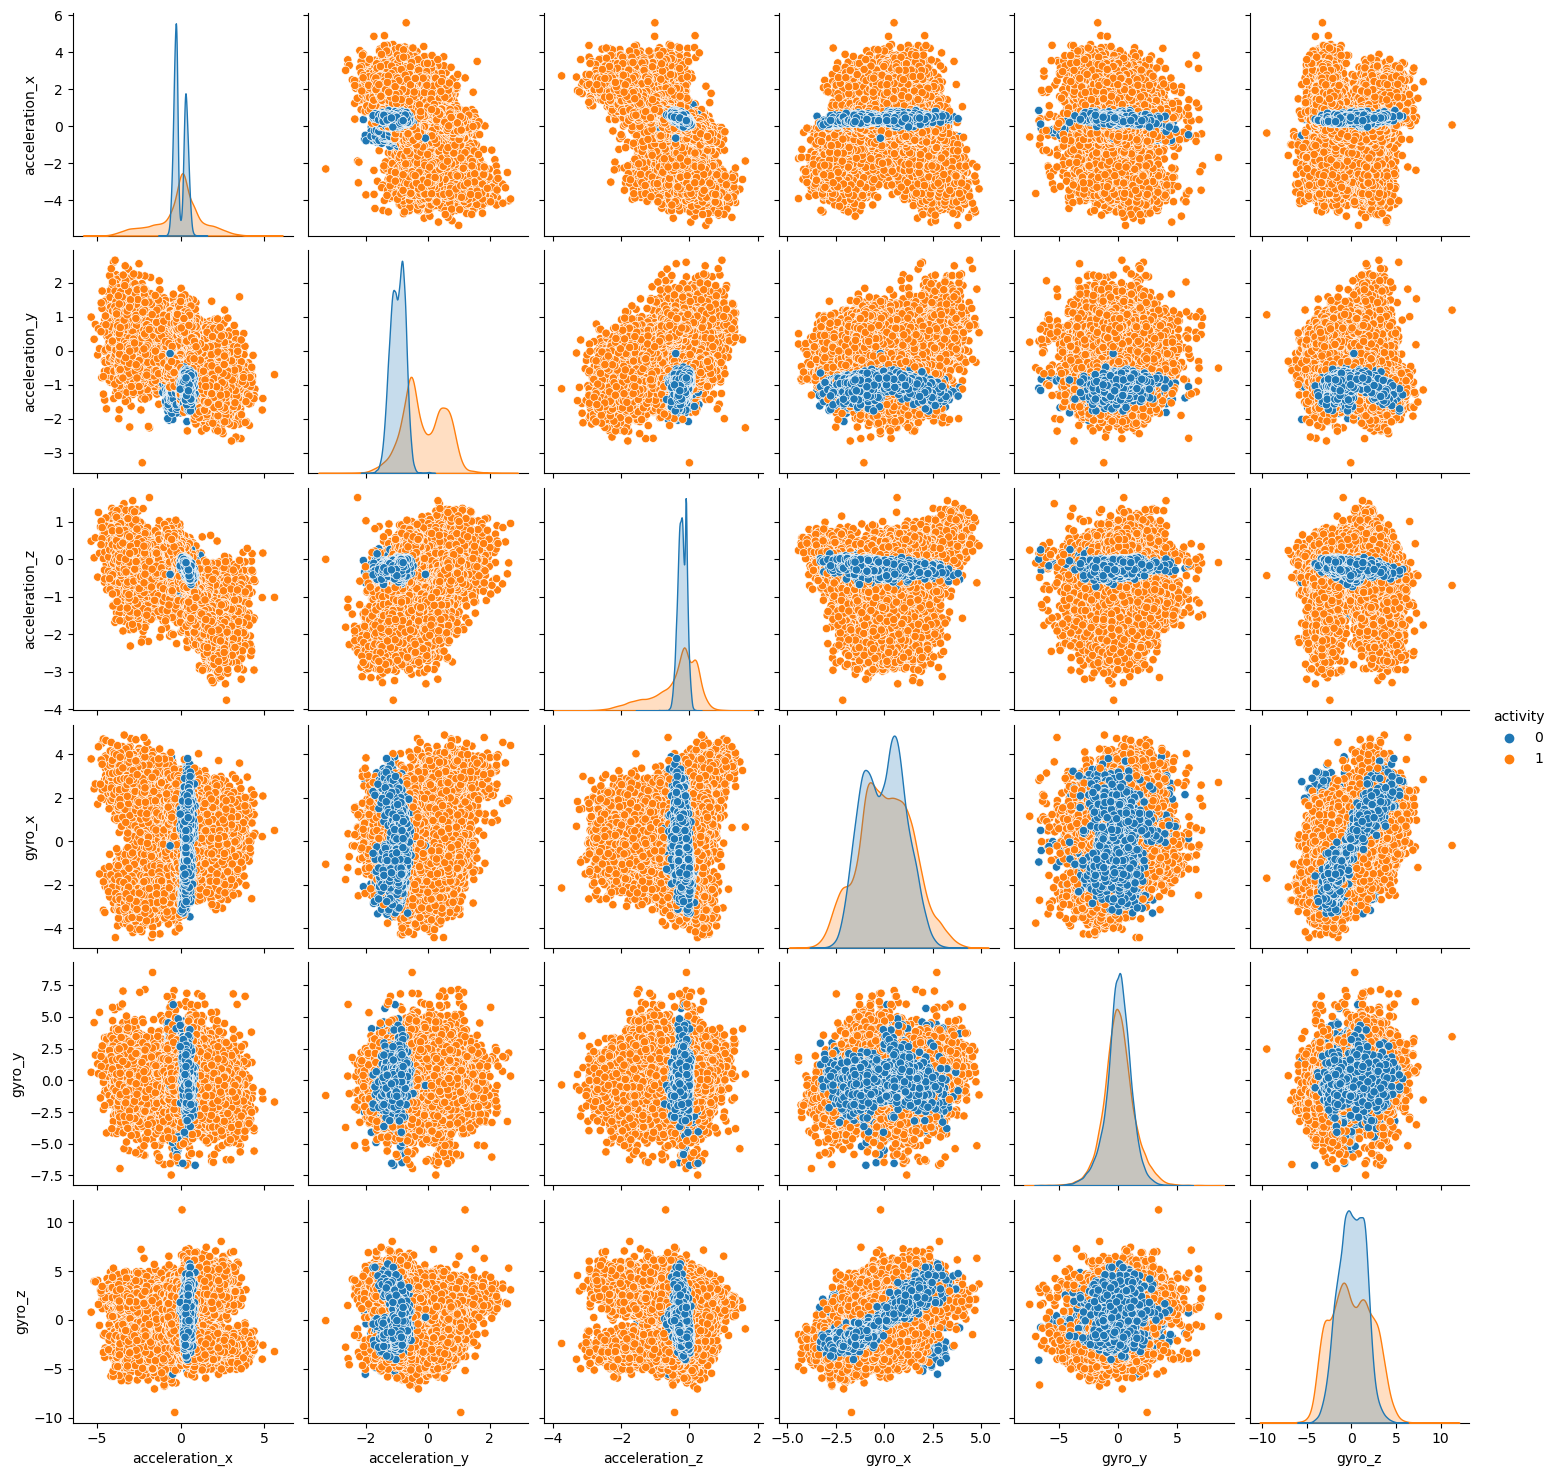

In [7]:
sns.pairplot(data,hue='activity')

None of the independent variables seem to be correlated to each other

In [8]:
# checking feature importances using xgboost
x=data.iloc[:,1:]
y=data['activity']
XGB=XGBClassifier()
XGB.fit(x,y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [9]:
XGB.feature_importances_

array([0.05115017, 0.5802131 , 0.28246385, 0.02609093, 0.01136928,
       0.04871268], dtype=float32)

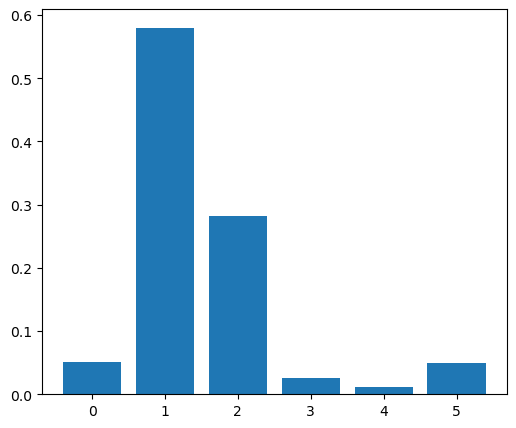

In [10]:
plt.figure(figsize=(6,5))
plt.bar(range(len(XGB.feature_importances_)),XGB.feature_importances_)
plt.show()

'acceleration_y' and 'gyro_y' appears to be the most and least important features respectively.Since all the features affects the target variable, though by different extents, and they do not possess any visible correlation between each other, there is no need for any feature elimination.

### Visualising the outliers

<AxesSubplot:>

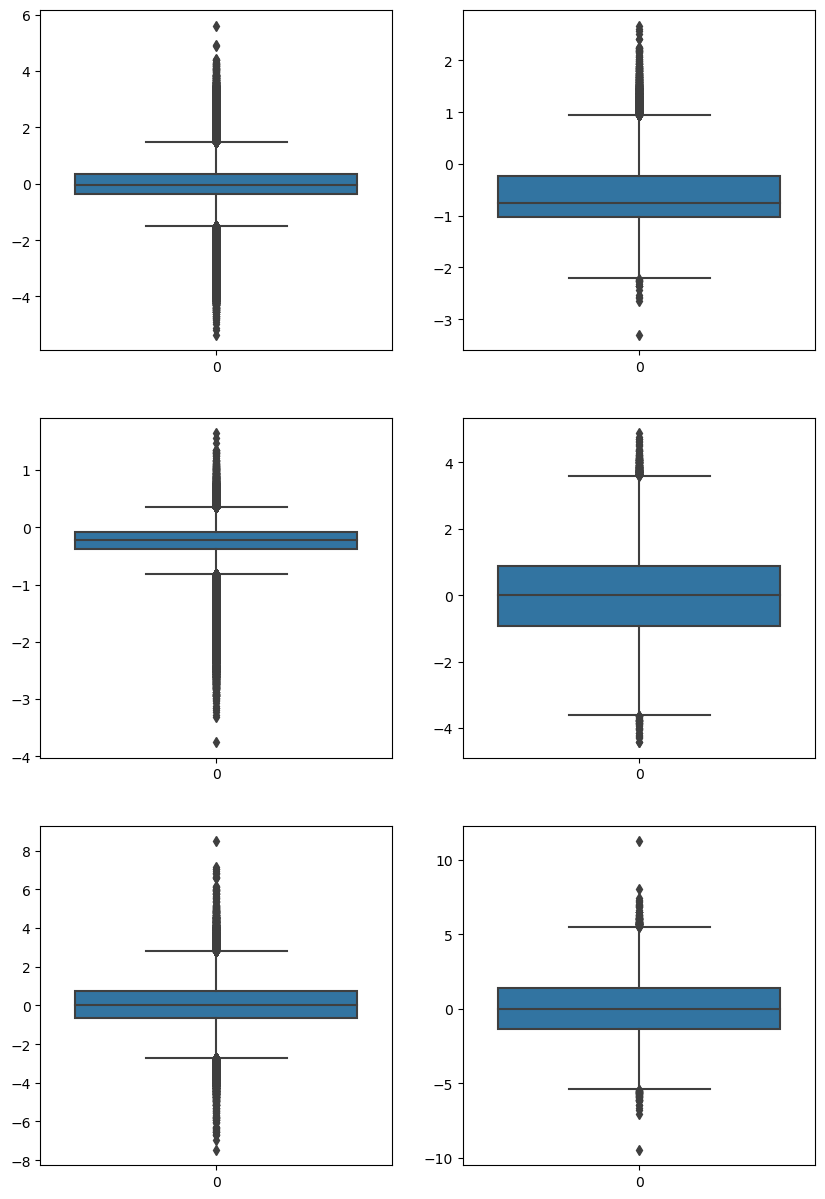

In [11]:
plt.figure(figsize=(10,15))
plt.subplot(3,2,1)
sns.boxplot(data['acceleration_x'])
plt.subplot(3,2,2)
sns.boxplot(data['acceleration_y'])
plt.subplot(3,2,3)
sns.boxplot(data['acceleration_z'])
plt.subplot(3,2,4)
sns.boxplot(data['gyro_x'])
plt.subplot(3,2,5)
sns.boxplot(data['gyro_y'])
plt.subplot(3,2,6)
sns.boxplot(data['gyro_z'])

As most of the datapoints of all the features are more or less clustered, we can conclude that there are only few outliers, which can be seen as isolated points in the boxplots.

In [12]:
# removing the outliers
data['acceleration_x'][data['acceleration_x']>4.5]= data['acceleration_x'].mean()
data['acceleration_y'][data['acceleration_y']<-3]= data['acceleration_y'].mean()
data['acceleration_z'][data['acceleration_z']<-3.5]= data['acceleration_z'].mean()
data['gyro_y'].loc[(data['gyro_y']<-7)|(data['gyro_y']>8)]= data['gyro_y'].mean()
data['gyro_z'].loc[(data['gyro_z']<-9)|(data['gyro_z']>8)]= data['gyro_z'].mean()

<AxesSubplot:>

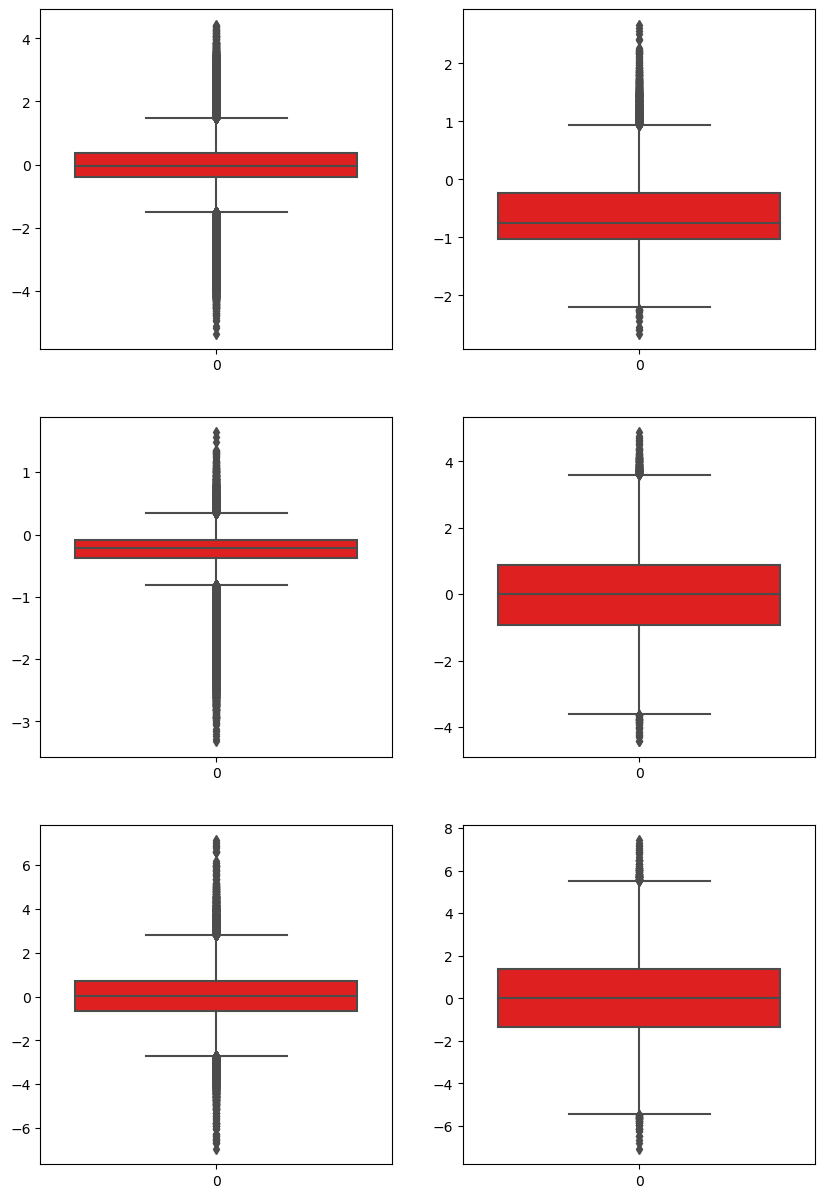

In [13]:
plt.figure(figsize=(10,15))
plt.subplot(3,2,1)
sns.boxplot(data['acceleration_x'],color='r')
plt.subplot(3,2,2)
sns.boxplot(data['acceleration_y'],color='r')
plt.subplot(3,2,3)
sns.boxplot(data['acceleration_z'],color='r')
plt.subplot(3,2,4)
sns.boxplot(data['gyro_x'],color='r')
plt.subplot(3,2,5)
sns.boxplot(data['gyro_y'],color='r')
plt.subplot(3,2,6)
sns.boxplot(data['gyro_z'],color='r')

### Exploratory Data Analysis

#### Visualising the numerical input

<AxesSubplot:xlabel='gyro_z', ylabel='Count'>

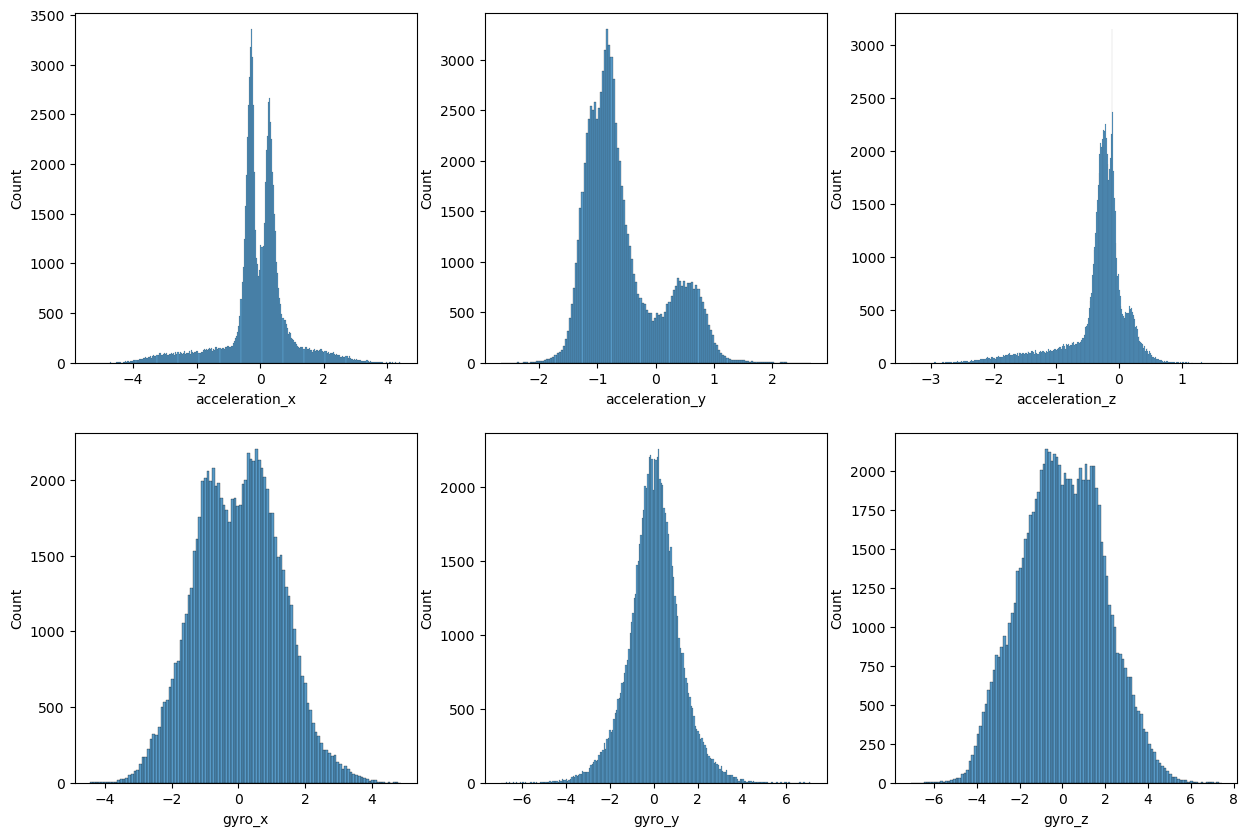

In [14]:
# checking skewness
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.histplot(data['acceleration_x'])
plt.subplot(2,3,2)
sns.histplot(data['acceleration_y'])
plt.subplot(2,3,3)
sns.histplot(data['acceleration_z'])
plt.subplot(2,3,4)
sns.histplot(data['gyro_x'])
plt.subplot(2,3,5)
sns.histplot(data['gyro_y'])
plt.subplot(2,3,6)
sns.histplot(data['gyro_z'])

All features are almost normally distributed

In [15]:
data.activity.value_counts()

1    44365
0    44223
Name: activity, dtype: int64

<AxesSubplot:xlabel='activity', ylabel='count'>

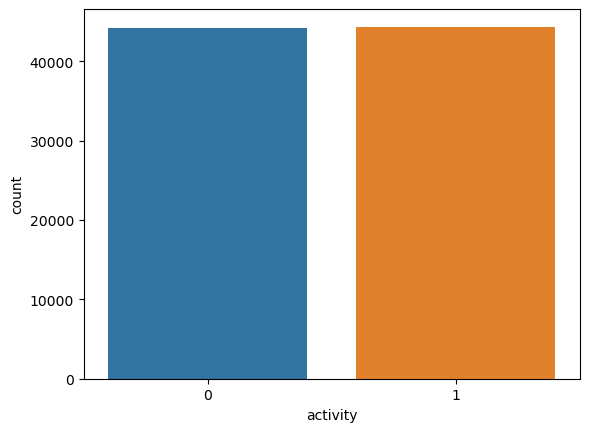

In [16]:
sns.countplot(x = data['activity'])

1.The count of target variable are allmost equally divided.

2.Here the activity column 0 values are walking.

3.Here the activity column 1 values are running.

### Checking the correlation

<AxesSubplot:>

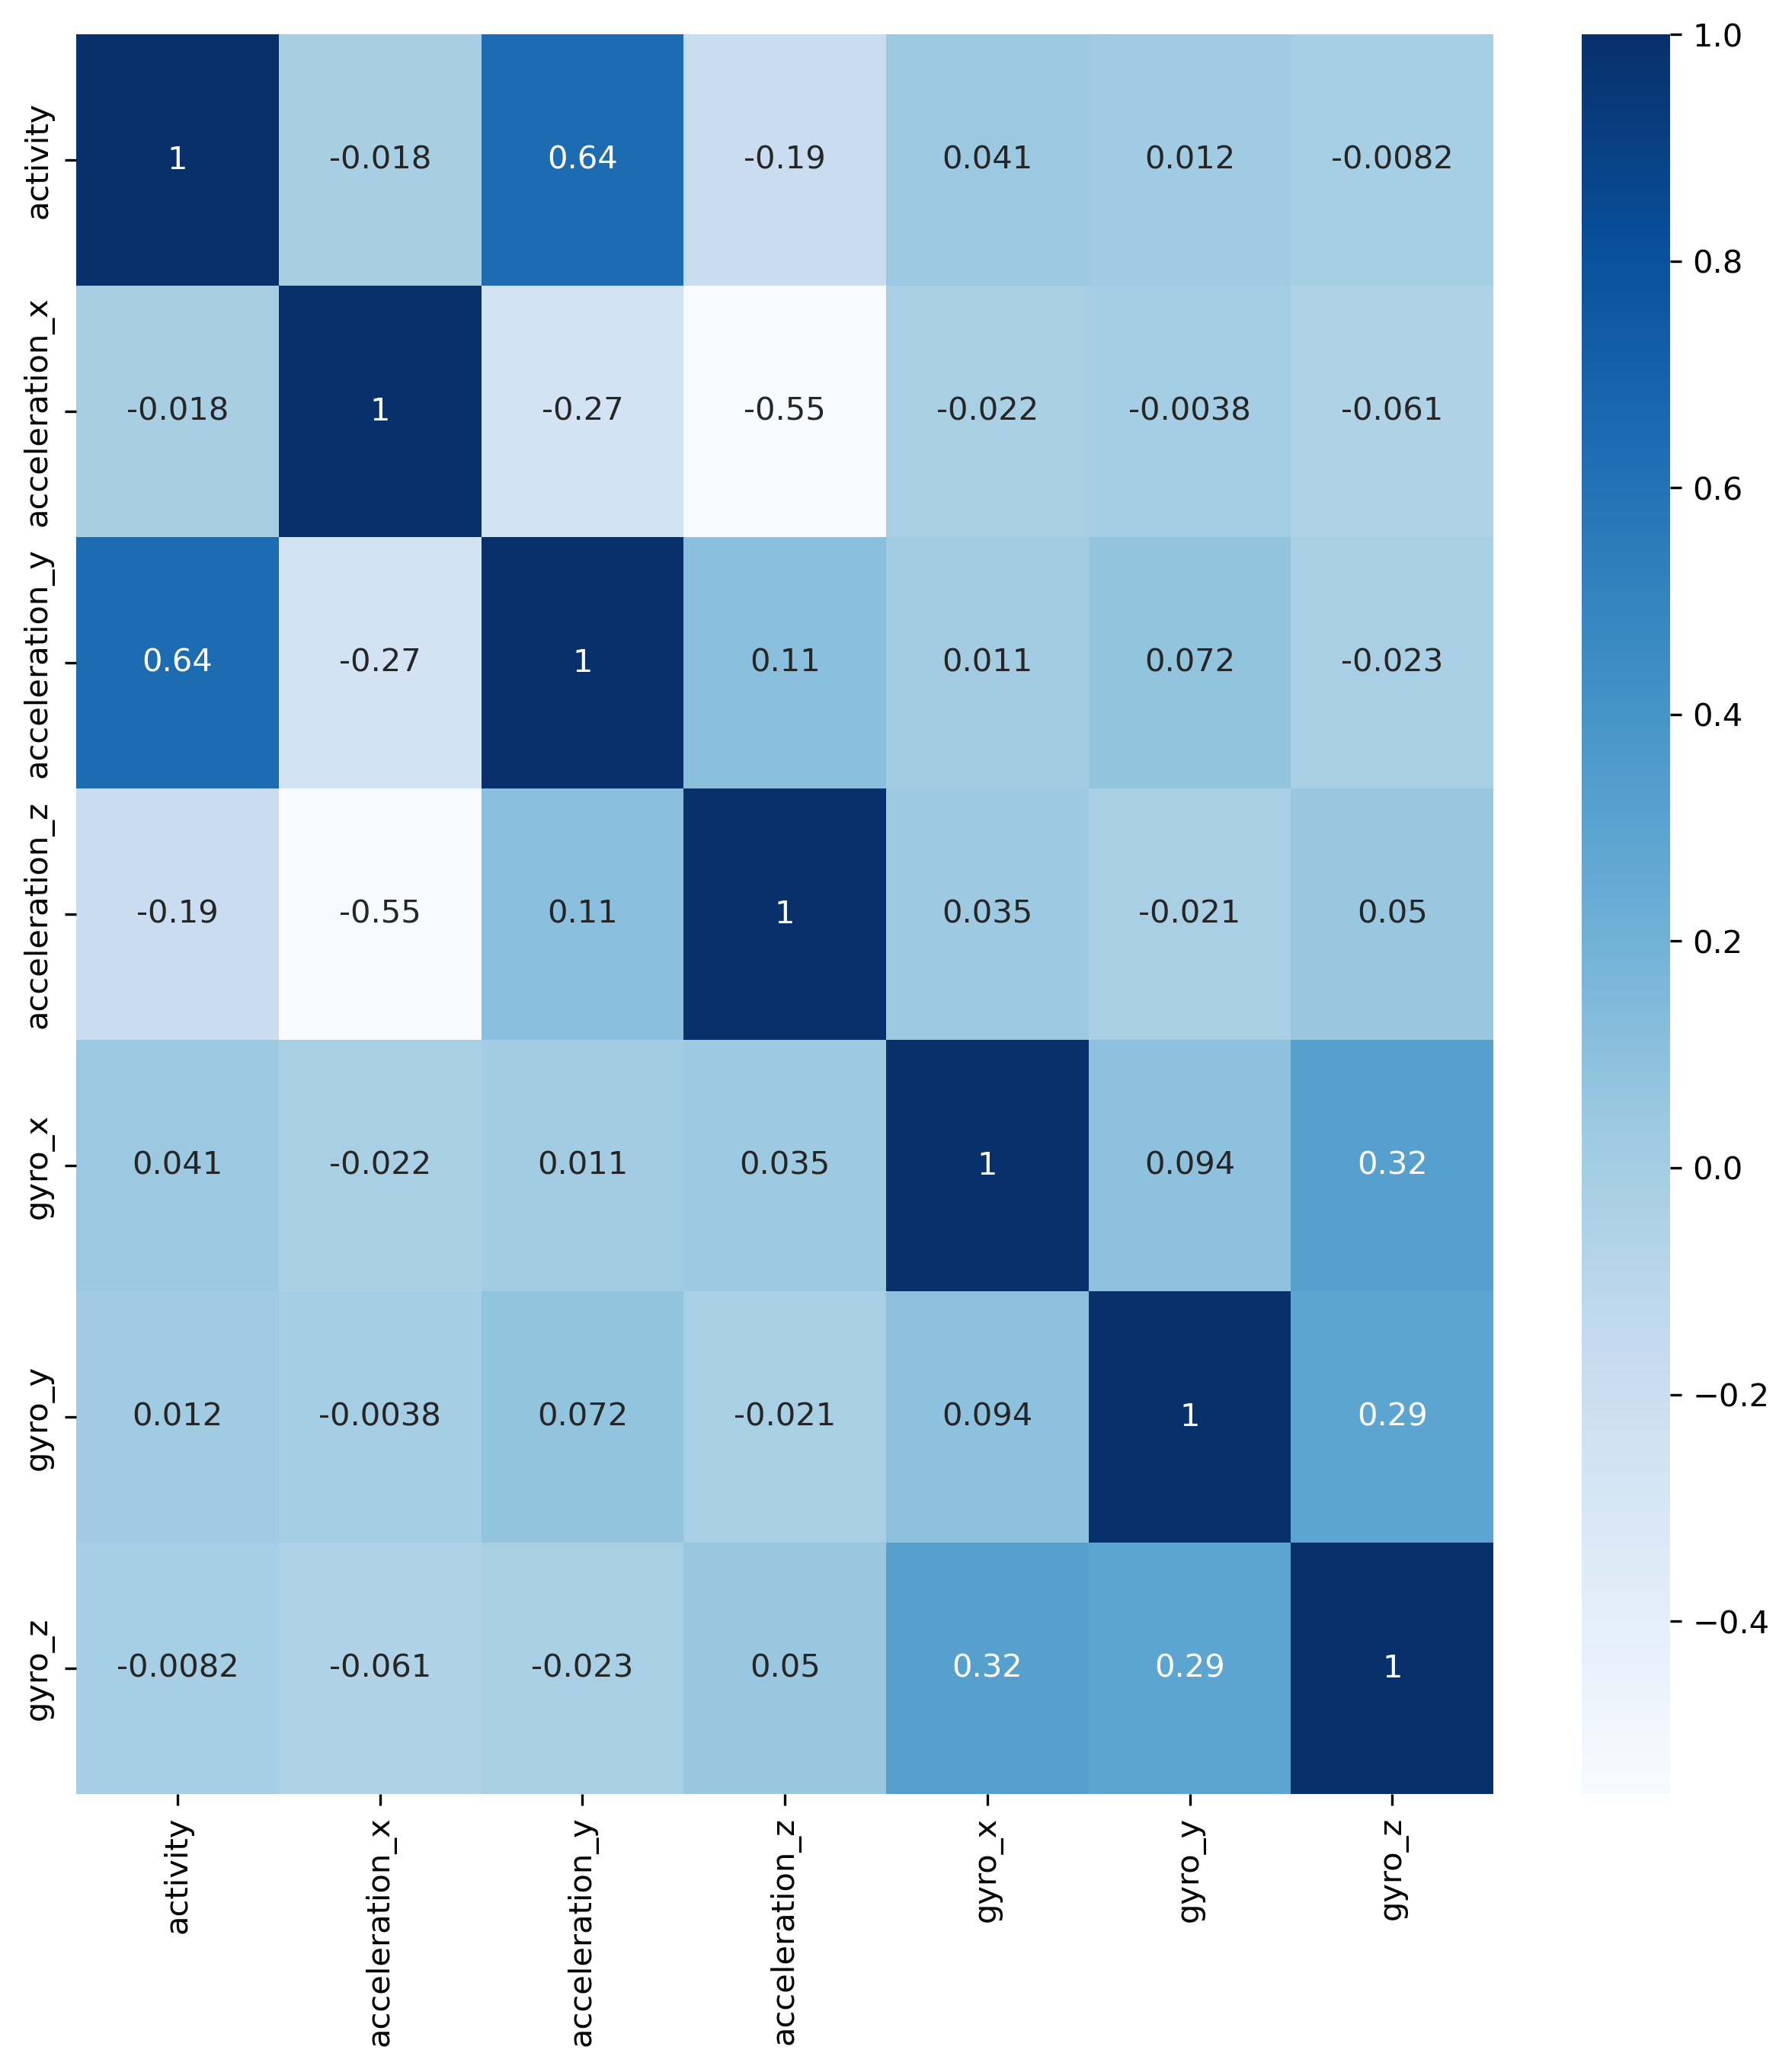

In [17]:
# Getting the correlations of each features in dataset

corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10), dpi = 300)

# Plot Heatmap

sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="Blues")

Only acceleration_x seems to have high correlation with wrist (-0.61).

### STEP 4: DATA PRE-PROCESSING

In [18]:
# splitting the data
x=data.iloc[:,1:]
y=data['activity']

In [19]:
# Checking the independent variable
x

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...
88583,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [20]:
# Checking the dependent variable
y

0        0
1        0
2        0
3        0
4        0
        ..
88583    0
88584    0
88585    0
88586    0
88587    0
Name: activity, Length: 88588, dtype: int64

#### Splitting into training and testing data

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

#### Standardization of datasets

In [22]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [23]:
x_train.shape

(70870, 6)

In [24]:
x_train=x_train.reshape(-1,1,6)

In [25]:
x_train.shape

(70870, 1, 6)

In [26]:
x_test.shape

(17718, 6)

### STEP 5: BUILDING THE MODEL

In [27]:
# Creating the model
model=Sequential()

# RNN layer
model.add(LSTM(units=100,input_shape=(1,6),return_sequences=True))
model.add(LSTM(units=100,input_shape=(1,6),return_sequences=True))

# Dropout layer
model.add(Dropout(0.2))

# Dense layer with activition functions
model.add(Dense(units=2,activation='softmax'))

# Compile model
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 100)            42800     
                                                                 
 lstm_1 (LSTM)               (None, 1, 100)            80400     
                                                                 
 dropout (Dropout)           (None, 1, 100)            0         
                                                                 
 dense (Dense)               (None, 1, 2)              202       
                                                                 
Total params: 123,402
Trainable params: 123,402
Non-trainable params: 0
_________________________________________________________________


In [29]:
history=model.fit(x_train,y_train,epochs=20,validation_split=0.2,batch_size=32)

Epoch 1/20
1772/1772 [==============================] - 9s 4ms/step - loss: 0.1063 - accuracy: 0.9639 - val_loss: 0.0600 - val_accuracy: 0.9789
Epoch 2/20
1772/1772 [==============================] - 6s 3ms/step - loss: 0.0593 - accuracy: 0.9802 - val_loss: 0.0530 - val_accuracy: 0.9802
Epoch 3/20
1772/1772 [==============================] - 6s 3ms/step - loss: 0.0512 - accuracy: 0.9832 - val_loss: 0.0474 - val_accuracy: 0.9839
Epoch 4/20
1772/1772 [==============================] - 6s 3ms/step - loss: 0.0452 - accuracy: 0.9857 - val_loss: 0.0387 - val_accuracy: 0.9869
Epoch 5/20
1772/1772 [==============================] - 6s 3ms/step - loss: 0.0405 - accuracy: 0.9866 - val_loss: 0.0379 - val_accuracy: 0.9870
Epoch 6/20
1772/1772 [==============================] - 6s 3ms/step - loss: 0.0367 - accuracy: 0.9875 - val_loss: 0.0336 - val_accuracy: 0.9889
Epoch 7/20
1772/1772 [==============================] - 6s 3ms/step - loss: 0.0349 - accuracy: 0.9880 - val_loss: 0.0312 - val_accuracy:

### Accuracy Graph

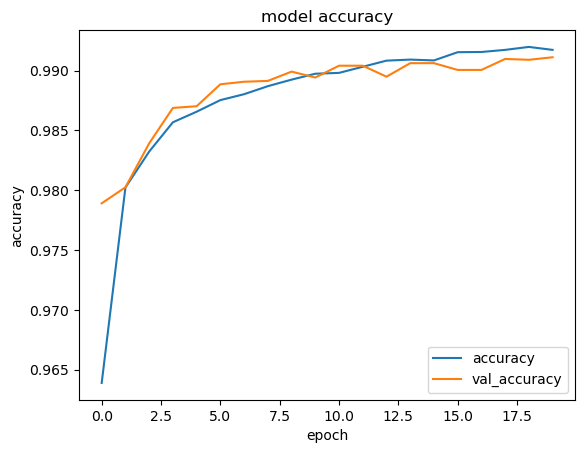

In [30]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label= 'val_accuracy')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()

#### Loss Graph

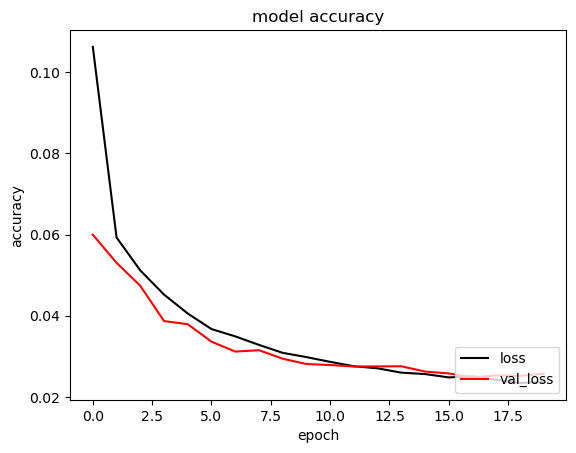

In [31]:
plt.plot(history.history['loss'], label='loss',color='k')
plt.plot(history.history['val_loss'], label= 'val_loss',color='r')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()

### Project Analysis

A better understanding of Recurrent neural networks(RNN) and Long short term memory(LSTM) networks was imperative for the execution of this project. Several articles and videos pertinent to the same was explored for achieving this. We understood that an LSTM network is a type of RNN, which is capable of learning order dependence especially in sequence prediction problems. They use information from previous steps along with new information to carry out the predictions.

The dataset given comprises of accelerometer and gyroscope readings for each of the sensor's axes, thus making a total of 6 independent variables or predictors.

The pairplot function from seaborn was used inorder to visualize the realationship between each of the predictors so as to detect any kind of correlation between them, which in this case, was absent.Then, boxplots where used to detect the outliers in the data. Even though there were several points outside the inter-quartile range, they were clustered together and were not taken as outliers. However, the isolated points at the extremities were eliminated and imputed with the mean value. Skewness was checked using the histplot function from matplotlib. It was observed that most of the features are almost normally distributed.Applying log, square root or cube root transformations were unsuccessful as skewness of one or more features increased as the others decreased. So the skewness was left as such. The count plot showed an equillibrium of the values of target variable in the given dataset. Feature importances were measured by utilizing the XGBclassifier from xgboost and 'accelerometer_y' and 'gyro_y' had the maximum and minimum values respectively.

Data pre-processing involved eliminating redundant variables('username','date','time','wrist') and splitting the predictor and target variable into x and y respectively.This was further split into training and testing dataset for model training and evaluation. The data was normalized using the StandardScaler package from scikit learn inorder to reduce the computational complexity.

Model was built using the Sequential,LSTM,Dropout and Dense functions from the keras API. Two LSTM layers, each with 100 units one dropout layer with a rate of 0.2 to prevent overfitting and one Dense layer using 'softmax' activation for classification was used to build the model.Model was compiled with sparse categorical cross entropy as the loss function, accuracy as the evaluation metric and Adam as the optimizer. After running the model upto 20 epochs at a batch size of 32 and a validation split of 20% using the training data, a validation accuracy of 99.1% was achieved.This was followed by saving the model, loading it and then tesing it using the test data, where we achieved an accuracy of ~99.165%.